<a href="https://colab.research.google.com/github/JuanPedroDelCastillo/FisicaComputacional1/blob/master/Evaluacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evaluación 2**

In [3]:
# Importamos Bibliotecas

import numpy as np
import scipy.linalg as la
from scipy import integrate, linalg
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits import mplot3d 

Se pide resolver numéricamente la ecuación diferencial de un oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal, con ayuda de la función odeint de scipy.integrate.

La ecuación diferencial del oscilador amortiguado es

$$\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}$$
donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

$$\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}$$
y $\zeta$ es la tasa de amortiguamiento dado por la expresión

$$\begin{equation*}
\zeta = \frac{c}{2 \sqrt{mk}}
\end{equation*}$$
siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire.

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$).

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:

Movimiento sobreamortiguado ($\zeta > 1$). El sistema decae exponencialmente al estado estacionario sin oscilar.
Críticamente amortiguado ($\zeta=1 $).
Movimiento subamortiguado ($\zeta < 1$). Movimiento periódico que decae exponencialmente.
Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular.

## Problema 1

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) < 0, x'(0) = 0$.

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$

---

Primero reescribimos la ecuación diferencial:

$$\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = 0
\end{equation*}$$

donde 
$$\omega_n = 3 $$

Separamos la ecuación de segundo orden en un sistema de ecuaciones de primer orden:

$$ \frac{dx}{dt} = v $$

$$ \frac{dv}{dt} = - 9x -6 \zeta  v $$ 

Podemos escribir el sistema de ecuaciones en la forma:

$$ \frac{d\vec{p}}{dt} = \begin{pmatrix} \frac{dx}{dt} \\ \frac{dv}{dt} \end{pmatrix} $$

$$ \frac{d\vec{p}}{dt} = \begin{bmatrix} v \\ -9x - 6\zeta v \end{bmatrix} $$

In [69]:
# Definimos los valores de zeta:

Z = [0, 0.1, 0.2, 0.4, 0.7, 1, 2]

# Definimos la función F(t,p), el lado derecho de la ecuacion diferencial
# La solución p es un arreglo 1-D, p=(x, v), dp/dt es un arreglo

def EDO1(p, t, C):
        x, v = p
        dpdt = [v, -9*x -6*C*v]
        return dpdt

# Definimos las condiciones iniciales:
p0 = [-2, 0]

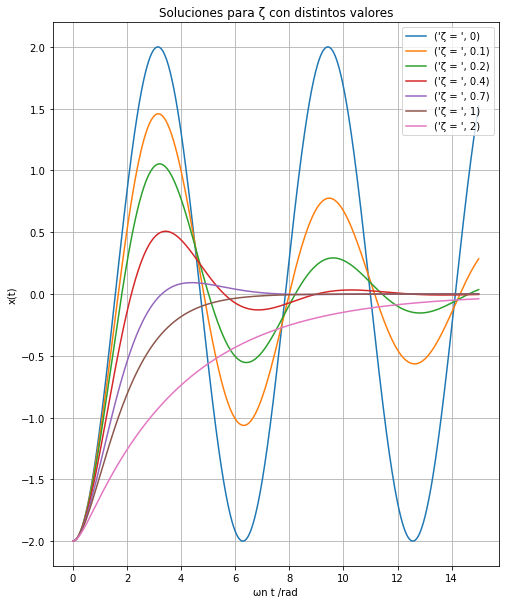

In [70]:
# Definimos el tiempo de integración de 0 a 10 segundos 
t = np.linspace(0, 5, 5000)

# Usamos el método de integración de scipy.integrate.odeint

plt.figure(figsize=(8,10))
for C in Z:
  p = odeint(EDO1, p0, t, args=(C, ))
  plt.plot(3*t, p[:, 0] , label= ('ζ = ', C ))
plt.legend(loc='best')
plt.title('Soluciones para ζ con distintos valores')
plt.xlabel('ωn t /rad')
plt.ylabel('x(t)')
plt.grid()
plt.show()

## Problema 2

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$).

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

---

Primero reescribimos la ecuación diferencial:

$$\begin{equation*}
\frac{d^2 x}{d t^2} + \omega_n^2 x = \frac{1}{m} F_0 \sin(\omega t) 
\end{equation*}$$

donde 

$\omega_n = 3 $ ; $ m = 1 $ ; $ F_0 = 1 $

Separamos la ecuación de segundo orden en un sistema de ecuaciones de primer orden:

$$ \frac{dx}{dt} = v $$

$$ \frac{dv}{dt} = - 9x + \sin{\omega t} $$ 

Podemos escribir el sistema de ecuaciones en la forma:

$$ \frac{d\vec{p}}{dt} = \begin{pmatrix} \frac{dx}{dt} \\ \frac{dv}{dt} \end{pmatrix} $$

$$ \frac{d\vec{p}}{dt} = \begin{bmatrix} v \\ -9x + \sin{\omega t} \end{bmatrix} $$

In [71]:
# Definimos los valores de zeta:

Z = [3.5, 3.3, 3.1, 3]

# Definimos la función F(t,p), el lado derecho de la ecuacion diferencial
# La solución p es un arreglo 1-D, p=(x, v), dp/dt es un arreglo

def EDO2(p, t, w):
        x, v = p
        dpdt = [v, -9*x + np.sin(w*t)]
        return dpdt

# Definimos las condiciones iniciales:
p0 = [0, 0]

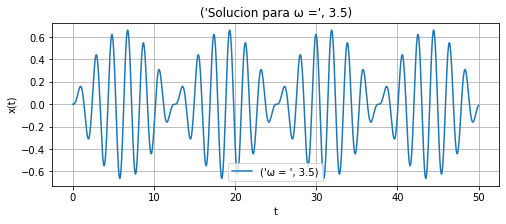

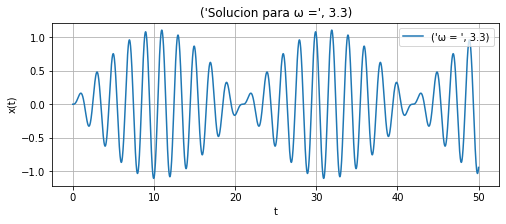

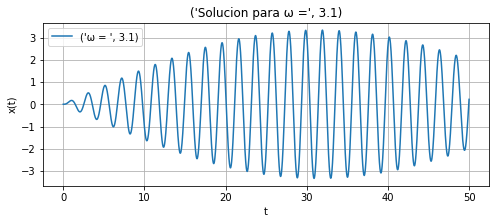

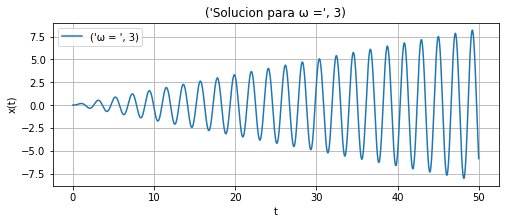

In [72]:
# Definimos el tiempo de integración de 0 a 10 segundos 
t = np.linspace(0, 50, 5000)

# Usamos el método de integración de scipy.integrate.odeint

for w in Z:
  plt.figure(figsize=(8,3))
  p = odeint(EDO2, p0, t, args=(w, ))
  plt.plot(t, p[:, 0] , label= ('ω = ', w ))
  plt.legend(loc='best')
  plt.title(('Solucion para ω =', w))
  plt.xlabel('t')
  plt.ylabel('x(t)')
  plt.grid()
  plt.show()

## Problema 3

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$.

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado.

---

Primero reescribimos la ecuación diferencial:

$$\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}$$

donde 

$ \zeta = 0.1 $ ; $\omega_n = 3 $ ; $ m = 1 $ ; $ F_0 = 1 $

Separamos la ecuación de segundo orden en un sistema de ecuaciones de primer orden:

$$ \frac{dx}{dt} = v $$

$$ \frac{dv}{dt} = - 9x - 0.6v + \sin{\omega t} $$ 

Podemos escribir el sistema de ecuaciones en la forma:

$$ \frac{d\vec{p}}{dt} = \begin{pmatrix} \frac{dx}{dt} \\ \frac{dv}{dt} \end{pmatrix} $$

$$ \frac{d\vec{p}}{dt} = \begin{bmatrix} v \\ -9x - 0.6v + \sin{\omega t} \end{bmatrix} $$

In [73]:
# Definimos los valores de zeta:

Z = [3.5, 3.3, 3.1, 3]

# Definimos la función F(t,p), el lado derecho de la ecuacion diferencial
# La solución p es un arreglo 1-D, p=(x, v), dp/dt es un arreglo

def EDO3(p, t, w):
        x, v = p
        dpdt = [v, -9*x -0.6*v + np.sin(w*t)]
        return dpdt

# Definimos las condiciones iniciales:
p0 = [0, 0]

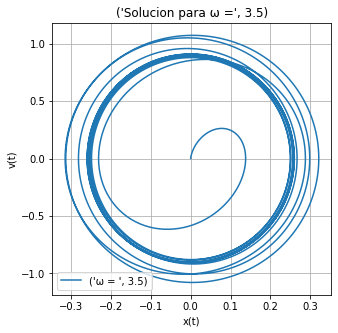

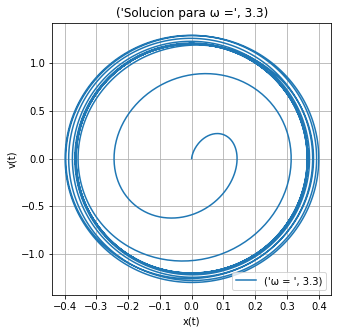

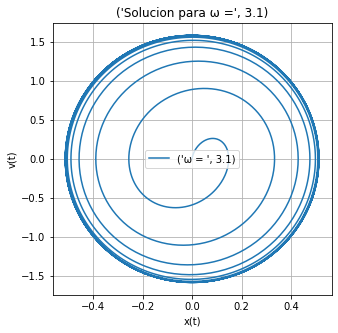

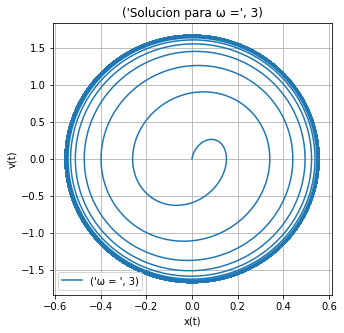

In [74]:
# Definimos el tiempo de integración de 0 a 10 segundos 
t = np.linspace(0, 50, 5000)

# Usamos el método de integración de scipy.integrate.odeint

for w in Z:
  plt.figure(figsize=(5,5))
  p = odeint(EDO3, p0, t, args=(w, ))
  plt.plot(p[:, 0], p[:, 1] , label= ('ω = ', w ))
  plt.legend(loc='best')
  plt.title(('Solucion para ω =', w))
  plt.xlabel('x(t)')
  plt.ylabel('v(t)')
  plt.grid()
  plt.show()